<a href="https://colab.research.google.com/github/GerardoMunoz/ML/blob/main/Logistic_SPAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Función Sigmoide

$f(t)=\frac{1}{1+e^{-t}}$

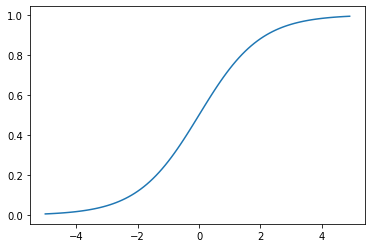

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x=np.arange(-5,5,0.1)
y=1/(1+np.e**(-x))
plt.plot(x,y)

Función sigmoide con diferentes inclinaciones en $y=0.5$

$f(t)=\frac{1}{1+e^{-(\beta_0+t)}}$

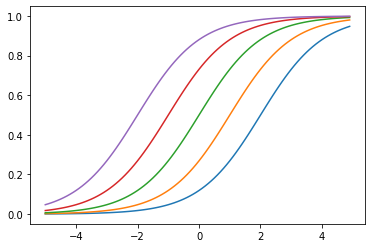

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x=np.arange(-5,5,0.1)
y0=1/(1+np.e**(-(-2+x)))
y1=1/(1+np.e**(-(-1+x)))
y2=1/(1+np.e**(-(0+x)))
y3=1/(1+np.e**(-(1+x)))
y4=1/(1+np.e**(-(2+x)))
plt.plot(x,y0)
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)


Función sigmoide con diferentes valores de $x$ para  $y=0.5$

$f(t)=\frac{1}{1+e^{-\beta_1t}}$

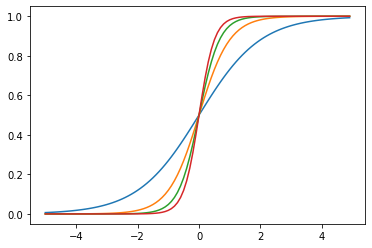

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x=np.arange(-5,5,0.1)
y1=1/(1+np.e**(-x))
y2=1/(1+np.e**(-2*x))
y3=1/(1+np.e**(-3*x))
y4=1/(1+np.e**(-4*x))
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)


Función sigmoide con regresión logística 

$f(t)=\frac{1}{1+e^{-(\beta_0+\beta_1x_1+\beta_2x_2+\cdots+\beta_kx_k)}}$



In [ ]:
#Sólo ejecutar una vez
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip
#!unzip smsspamcollection.zip

In [ ]:
!cd SMSSpamCollection

/bin/bash: line 0: cd: SMSSpamCollection: Not a directory


In [ ]:
with open('SMSSpamCollection') as f:
  datos=f.readlines()

type(datos)

list

In [ ]:
len(datos)

5574

In [ ]:
type(datos[0])

str

In [ ]:
len(datos[0])

116

In [ ]:
datos[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\n'

In [ ]:
with open('SMSSpamCollection') as f:
    data = [line.strip().split('\t') for line in f.readlines()]

y, text = zip(*data)

type(y), type(text)

(tuple, tuple)

In [ ]:
len(y), len(text)

(5574, 5574)

In [ ]:
type(y[0]), type(text[0])

(str, str)

In [ ]:
y[0], text[0]

('ham',
 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

In [ ]:
y[1], text[1]

('ham', 'Ok lar... Joking wif u oni...')

In [ ]:
clases_cont={}
for dat in y:
  if dat in clases_cont:
    clases_cont[dat] += 1
  else: 
    clases_cont[dat]=1

clases_cont

{'ham': 4827, 'spam': 747}

In [ ]:
from sklearn.model_selection import train_test_split

text_train, text_test, y_train, y_test = train_test_split(text, y,
                                                          random_state=42,
                                                          test_size=0.25,
                                                          stratify=y)

len(text_train), len(text_test), len(y_train), len(y_test)

(4180, 1394, 4180, 1394)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

count_vectorizer = CountVectorizer()
count_vectorizer.fit(text_train)

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(text_train)

X_train_cnt = count_vectorizer.transform(text_train)
X_test_cnt = count_vectorizer.transform(text_test)

X_train_tfidf = tfidf_vectorizer.transform(text_train)
X_test_tfidf = tfidf_vectorizer.transform(text_test)



X_train_cnt.shape, X_test_cnt.shape, X_train_tfidf.shape, X_test_tfidf.shape

((4180, 7448), (1394, 7448), (4180, 7448), (1394, 7448))

In [ ]:
primer=[]
for i in X_train_tfidf[0,:]:
  print(dir(i))

['__abs__', '__add__', '__array_priority__', '__bool__', '__class__', '__delattr__', '__dict__', '__dir__', '__div__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__idiv__', '__imul__', '__init__', '__init_subclass__', '__isub__', '__iter__', '__itruediv__', '__le__', '__len__', '__lt__', '__matmul__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__pow__', '__radd__', '__rdiv__', '__reduce__', '__reduce_ex__', '__repr__', '__rmatmul__', '__rmul__', '__round__', '__rsub__', '__rtruediv__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__truediv__', '__weakref__', '_add_dense', '_add_sparse', '_arg_min_or_max', '_arg_min_or_max_axis', '_asindices', '_binopt', '_cs_matrix__get_has_canonical_format', '_cs_matrix__get_sorted', '_cs_matrix__set_has_canonical_format', '_cs_matrix__set_sorted', '_deduped_data', '_divide', '_divide_sparse', '

In [ ]:
count_vectorizer.get_feature_names()[0]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


'00'

In [ ]:
from sklearn.linear_model import LogisticRegression

clf_cnt = LogisticRegression()
print(clf_cnt.fit(X_train_cnt, y_train))

clf_tfidf = LogisticRegression()
print(clf_tfidf.fit(X_train_tfidf, y_train))

LogisticRegression()
LogisticRegression()


In [ ]:
print('Count Vectorizer Performance : %.3f'%clf_cnt.score(X_test_cnt, y_test))
print('TfIdf Vectorizer Performance : %.3f'%clf_tfidf.score(X_test_cnt, y_test))

Count Vectorizer Performance : 0.984
TfIdf Vectorizer Performance : 0.930


In [ ]:
print('Count Vectorizer Performance : %.3f'%clf_cnt.score(X_test_tfidf, y_test))
print('TfIdf Vectorizer Performance : %.3f'%clf_tfidf.score(X_test_tfidf, y_test))

Count Vectorizer Performance : 0.866
TfIdf Vectorizer Performance : 0.973


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


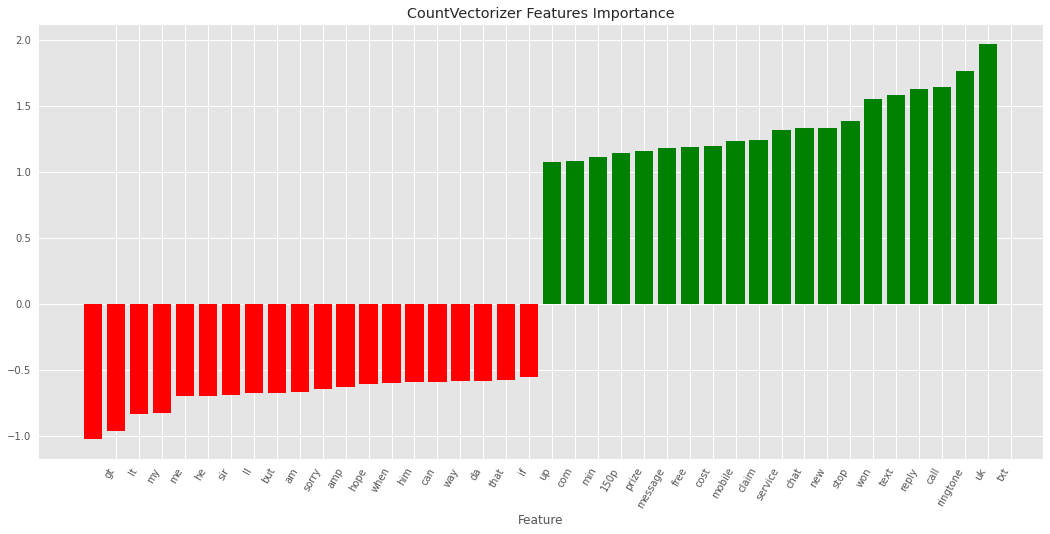

In [ ]:
coef = clf_cnt.coef_.ravel()
positive_coeffs = np.argsort(coef)[-20:]
negative_coeffs = np.argsort(coef)[:20]
interesting_coeffs = np.hstack([negative_coeffs, positive_coeffs])
# plot them
with plt.style.context(('seaborn', 'ggplot')):
    plt.figure(figsize=(18, 8))
    colors = ["red" if c < 0 else "green" for c in coef[interesting_coeffs]]
    plt.bar(np.arange(2 * 20), coef[interesting_coeffs], color=colors)
    feature_names = np.array(count_vectorizer.get_feature_names())
    plt.xticks(np.arange(1, 2 * 20 + 1), feature_names[interesting_coeffs], rotation=60, ha="right")
    plt.xlabel('Feature Importance')
    plt.xlabel('Feature')
    plt.title('CountVectorizer Features Importance')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


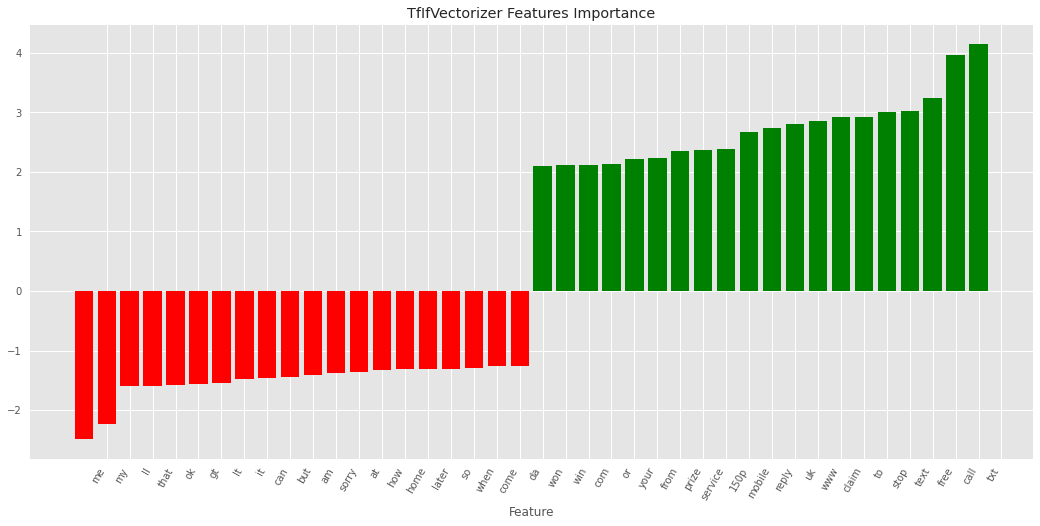

In [ ]:
coef = clf_tfidf.coef_.ravel()
positive_coeffs = np.argsort(coef)[-20:]
negative_coeffs = np.argsort(coef)[:20]
interesting_coeffs = np.hstack([negative_coeffs, positive_coeffs])
# plot them
with plt.style.context(('seaborn', 'ggplot')):
    plt.figure(figsize=(18, 8))
    colors = ["red" if c < 0 else "green" for c in coef[interesting_coeffs]]
    plt.bar(np.arange(2 * 20), coef[interesting_coeffs], color=colors)
    feature_names = np.array(tfidf_vectorizer.get_feature_names())
    plt.xticks(np.arange(1, 2 * 20 + 1), feature_names[interesting_coeffs], rotation=60, ha="right")
    plt.xlabel('Feature Importance')
    plt.xlabel('Feature')
    plt.title('TfIfVectorizer Features Importance')